In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\DataScienceInternship\HAMOYE\HAMOYE summer '22\Stage B\energydata_complete.csv")
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
#dataset size
df.shape

(19735, 29)

In [4]:
#renaming the features
columns = {
    "T1" : "Temp_kitchen", "RH_1" : "Hum_kitchen", "T2" : "Temp_living_room",
    "RH_2" : "Hum_living_room", "T3" : "Temp_laundry_room", "RH_3" : "Hum_aundry_room",
    "T4" : "Temp_office_room", "RH_4" : "Hum_office_room", "T5" : "Temp_bathroom", 
    "RH_5" : "Hum_bathroom", "T6" : "Temp_out(NS)", "RH_6" : "Hum_out(NS)", 
    "T7" : "Temp_ironing_room", "RH_7" : "Hum_ironing_room", "T8" : "Temp_teenager_room", 
    "RH_8" : "Hum_teenager_room", "T9" : "Temp_parents_room", "RH_9" : "Hum_parents_room", 
    "T_out" : "Temp_out(CWS)", "Press_mm_hg" : "Press_mm_hg(CWS)", "RH_out" : "RH_out(CWS)", 
    "Windspeed" : "Windspeed(CWS)", "Visibility" : "Visibility(CWS)", "Tdewpoint" : "Tdewpoint(CWS)", 
    "rv1" : "random_var_1", "rv2" : "random_var_2"
}

In [5]:
df = df.rename(columns = columns)

In [6]:
df.head(2)

,date,Appliances,lights,Temp_kitchen,Hum_kitchen,Temp_living_room,Hum_living_room,Temp_laundry_room,Hum_aundry_room,Temp_office_room,...,Temp_parents_room,Hum_parents_room,Temp_out(CWS),Press_mm_hg(CWS),RH_out(CWS),Windspeed(CWS),Visibility(CWS),Tdewpoint(CWS),random_var_1,random_var_2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195


In [7]:
#checking for missing values
df.isnull().sum()

date                  0
Appliances            0
lights                0
Temp_kitchen          0
Hum_kitchen           0
Temp_living_room      0
Hum_living_room       0
Temp_laundry_room     0
Hum_aundry_room       0
Temp_office_room      0
Hum_office_room       0
Temp_bathroom         0
Hum_bathroom          0
Temp_out(NS)          0
Hum_out(NS)           0
Temp_ironing_room     0
Hum_ironing_room      0
Temp_teenager_room    0
Hum_teenager_room     0
Temp_parents_room     0
Hum_parents_room      0
Temp_out(CWS)         0
Press_mm_hg(CWS)      0
RH_out(CWS)           0
Windspeed(CWS)        0
Visibility(CWS)       0
Tdewpoint(CWS)        0
random_var_1          0
random_var_2          0
dtype: int64

### Quiz Answers

### Q12

In [8]:
slr_df = df[["Temp_living_room", "Temp_out(NS)"]].sample(20, random_state = 2)

<AxesSubplot:xlabel='Temp_living_room', ylabel='Temp_out(NS)'>

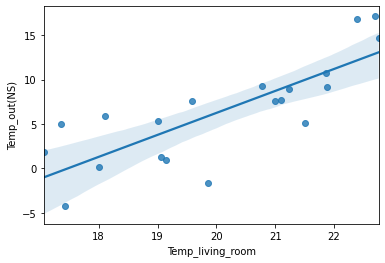

In [9]:
sns.regplot(x = "Temp_living_room", y = "Temp_out(NS)", data = slr_df)

In [10]:
from sklearn.metrics import r2_score
r2_score = r2_score(slr_df["Temp_living_room"], slr_df["Temp_out(NS)"])
round(r2_score, 2 )

-60.14

### Q13

In [12]:
new_df = df.drop(['date', 'lights'], axis = 1)
new_df.head(2)

,Appliances,Temp_kitchen,Hum_kitchen,Temp_living_room,Hum_living_room,Temp_laundry_room,Hum_aundry_room,Temp_office_room,Hum_office_room,Temp_bathroom,...,Temp_parents_room,Hum_parents_room,Temp_out(CWS),Press_mm_hg(CWS),RH_out(CWS),Windspeed(CWS),Visibility(CWS),Tdewpoint(CWS),random_var_1,random_var_2
0,60,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195


In [13]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(new_df), columns=new_df.columns)
features_df = normalised_df.drop(columns=['Appliances'])
target_df = normalised_df['Appliances']

In [14]:
#splitting dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, target_df, test_size= 0.3 , random_state= 42 )

In [15]:
#Regression Model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

#predictions
predicted_values = linear_model.predict(x_test)
predicted_values

array([0.03322207, 0.24411599, 0.03400024, ..., 0.06844707, 0.10032325,
       0.05722198])

### Q13,14,15,16

In [16]:
#Metric Scores
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(y_test, predicted_values)
print(f'Mean Absolute Error: {round(mae, 2)}')

rss = np.sum(np.square(y_test - predicted_values))
print(f'Residual Sum of Squares: {round(rss, 2)}')

rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
print(f'Root Mean Squared Error: {round(rmse, 3)}')

r2 = r2_score(y_test, predicted_values)
print(f'Coefficient of Determination: {round(r2, 2)}')

Mean Absolute Error: 0.05
Residual Sum of Squares: 45.35
Root Mean Squared Error: 0.088
Coefficient of Determination: 0.15


### Q17

In [17]:
#feature weight
def get_weights_df(model, feat, col_name):
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features' , col_name]
    weights_df[col_name]
    return weights_df

linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight' )
linear_model_weights

,Features,Linear_Model_Weight
0,Hum_living_room,-0.456698
1,Temp_out(CWS),-0.321860
2,Temp_living_room,-0.236178
3,Temp_parents_room,-0.189941
4,Hum_teenager_room,-0.157595
5,RH_out(CWS),-0.077671
6,Hum_ironing_room,-0.044614
7,Hum_parents_room,-0.039800
8,Temp_bathroom,-0.015657
9,Temp_kitchen,-0.003281


### Q18

In [18]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha= 0.4)
ridge_reg.fit(x_train, y_train)

ridge_predicted_values = ridge_reg.predict(x_test)
ridge_predicted_values

array([0.03321872, 0.24043824, 0.03461337, ..., 0.06872351, 0.10025536,
       0.05851175])

In [19]:
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predicted_values))
round(ridge_rmse, 3)

0.088

### Q19

In [20]:
#Lasso and Feature selection
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha= 0.001 )
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [21]:
lasso_reg_weight = get_weights_df(lasso_reg, x_train, 'Linear_Model_Weight' )
lasso_reg_weight

,Features,Linear_Model_Weight
0,RH_out(CWS),-0.049557
1,Hum_teenager_room,-0.000110
2,Temp_kitchen,0.000000
3,Tdewpoint(CWS),0.000000
4,Visibility(CWS),0.000000
5,Press_mm_hg(CWS),-0.000000
6,Temp_out(CWS),0.000000
7,Hum_parents_room,-0.000000
8,Temp_parents_room,-0.000000
9,Temp_teenager_room,0.000000


### Q20

In [22]:
lasso_predicted_values = lasso_reg.predict(x_test)
lasso_predicted_values

array([0.07370267, 0.08143458, 0.07716072, ..., 0.07792848, 0.09034412,
       0.08359255])

In [23]:
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predicted_values))
round(lasso_rmse, 3)

0.094